In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib notebook

In [125]:
#import crime dataset and pare down to columns of interest
df1 = pd.read_csv('crime.csv')
crime = df1.filter(['Dispatch_Date','Text_General_Code','Month'], axis=1)
crime.rename({"Month":"month", "Dispatch_Date":"date", "Text_General_Code":"crime_type"}, axis='columns', inplace=True)

crime.head()

,date,crime_type,month
0,2009-10-02,Other Assaults,2009-10
1,2009-05-10,All Other Offenses,2009-05
2,2009-08-07,Other Assaults,2009-08
3,2009-07-19,Weapon Violations,2009-07
4,2009-06-25,All Other Offenses,2009-06


In [126]:
#create grouped df of crimes so we can see totals per day
crimebyday = crime.groupby('date')
total_crimebyday = crimebyday['crime_type'].count().reset_index()
crimetype_byday = crimebyday['crime_type'].nunique().reset_index()


In [127]:
#import temperature data, focusing on Philadelphia and changing units
df2 = pd.read_csv('temperature.csv', delimiter=',', header=0, encoding='utf-8-sig')

temp = df2.filter(['datetime', 'Philadelphia'], axis=1)
temp.drop(0, inplace=True)
temp.reset_index()

def kel_to_cel(x):
    x = (x - 273.15)
    return(x)
temp["Philadelphia"] = temp["Philadelphia"].apply(kel_to_cel)

temp.rename({"Philadelphia":"deg_C", "datetime":"date"}, axis='columns', inplace=True)
temp.round({'deg_C':2})
temp['date'] = pd.to_datetime(temp['date']).dt.date

#grouping by day and finding mean temp per day
Tbyday = temp.groupby('date')
mean_Tbyday = Tbyday['deg_C'].mean().reset_index()


In [128]:
#creating date range of 1/1/2013 - 12/31/2016
Tbyday_range = mean_Tbyday.loc[92:1552].reset_index()
total_crimebyday_range = total_crimebyday.loc[2557:4017].reset_index()


<IPython.core.display.Javascript object>


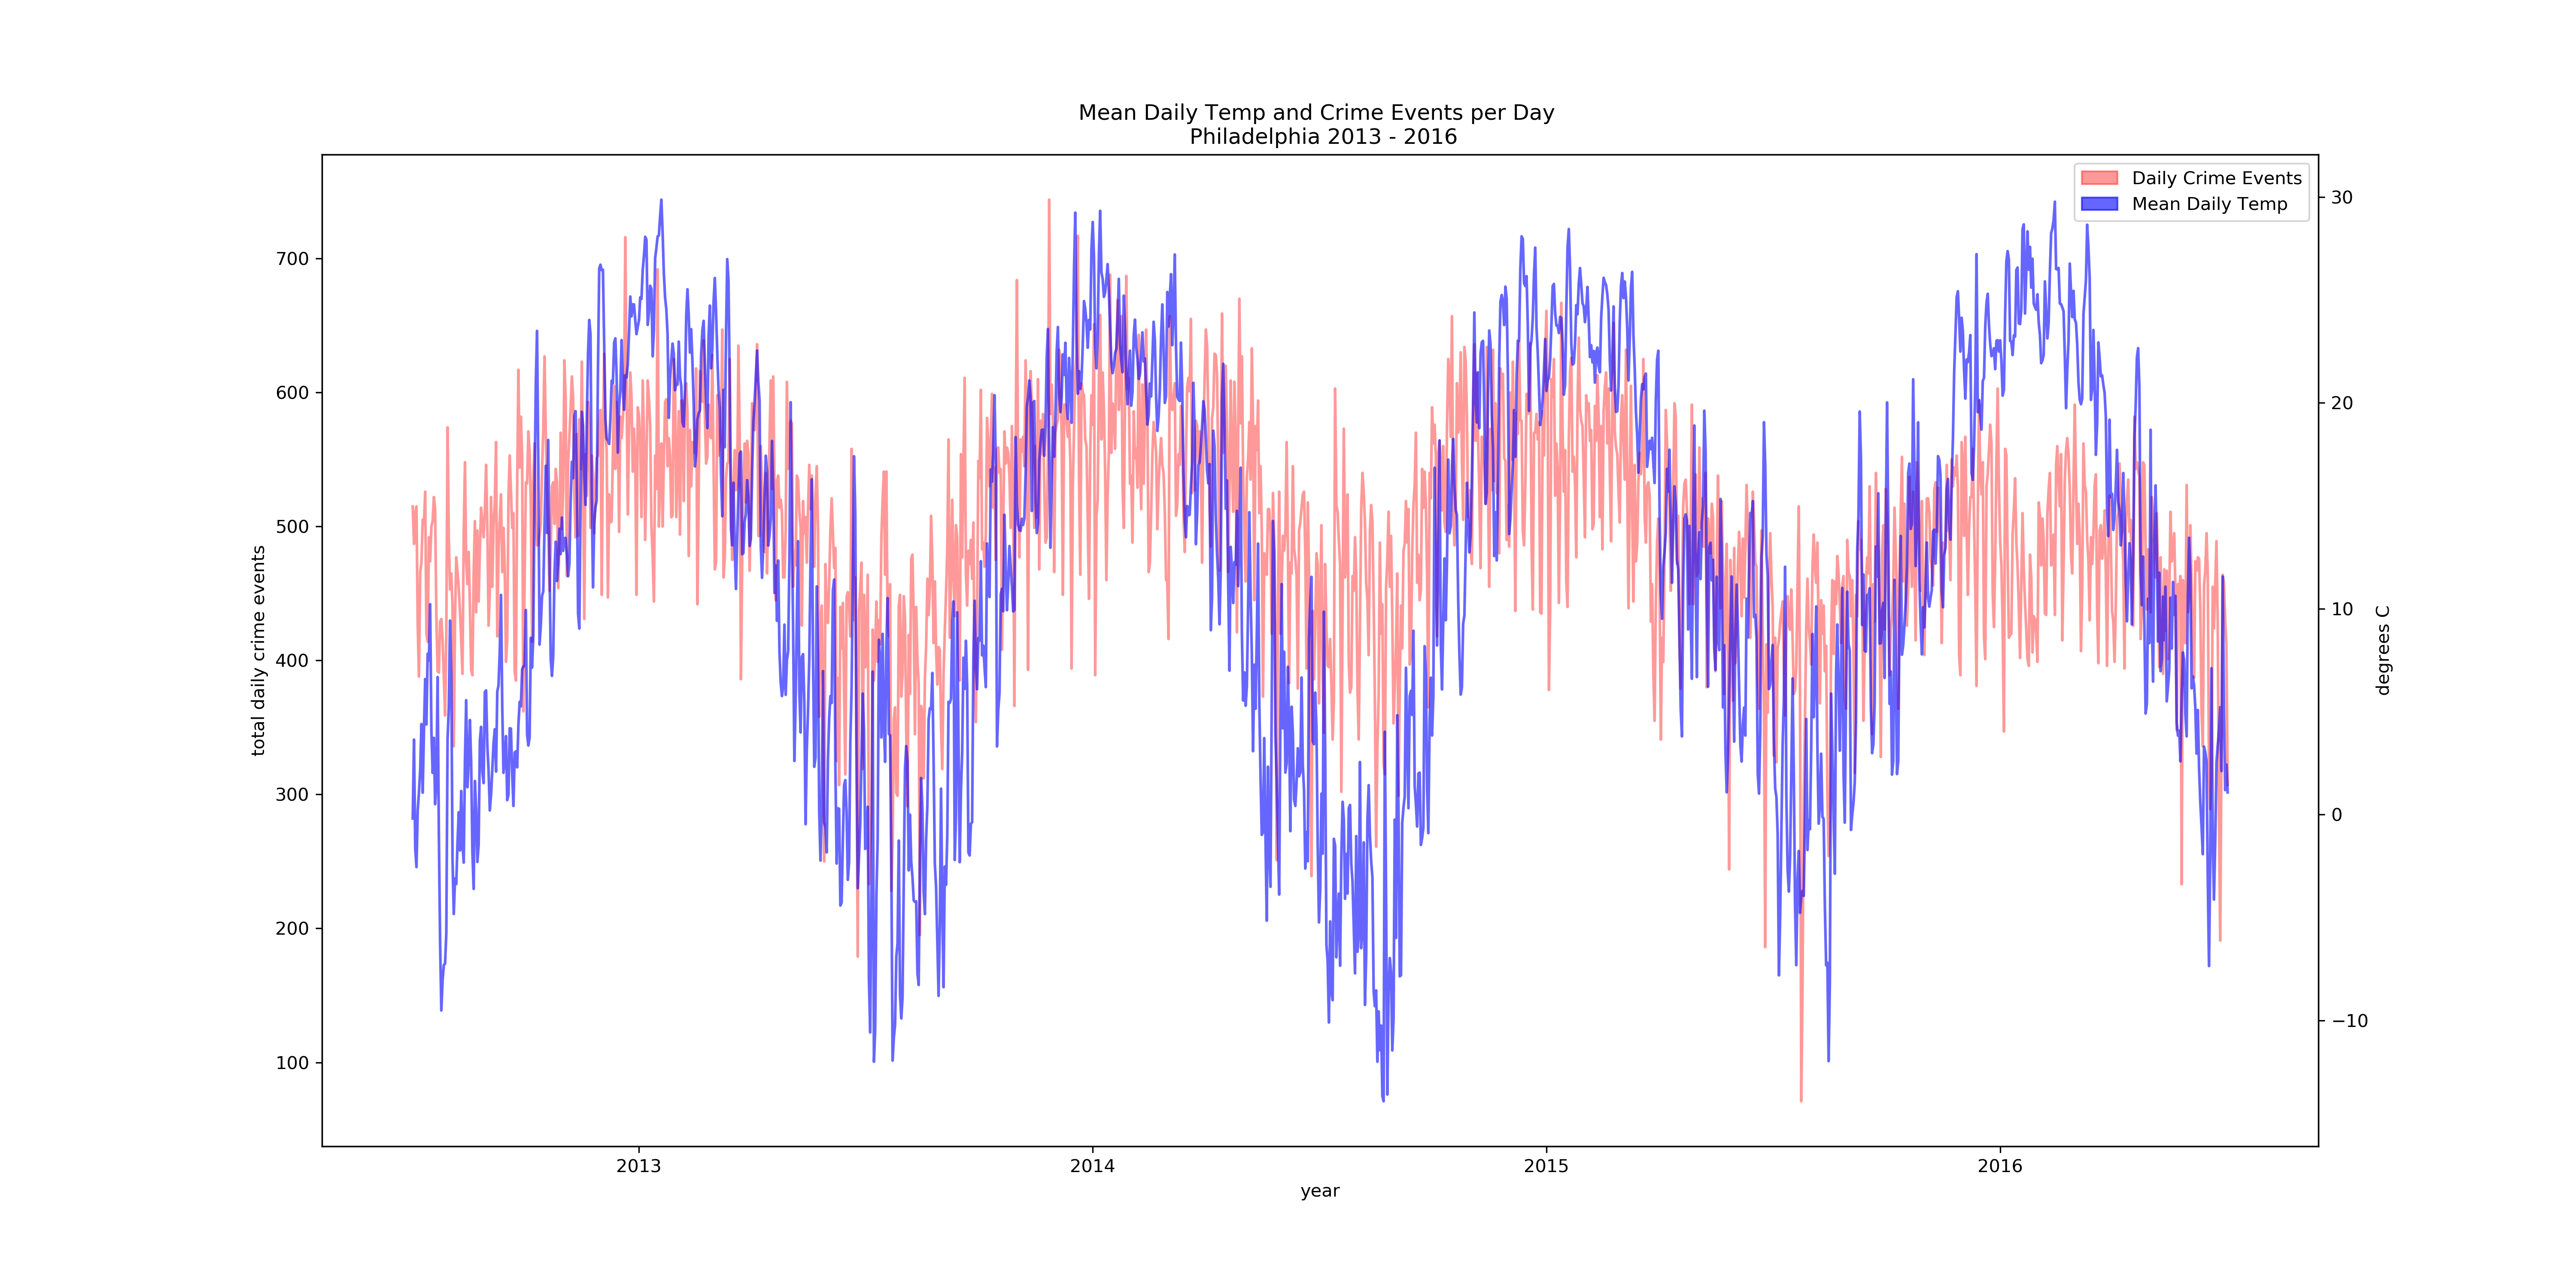

C:\Users\dunca\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [130]:
import matplotlib.patches as mpatches

plt.figure(figsize=(20,10))
plt.title('Mean Daily Temp and Crime Events per Day \n Philadelphia 2013 - 2016')

plt.subplot(111)
plt.plot(total_crimebyday_range['crime_type'], color='red', alpha=0.4)
plt.ylabel('total daily crime events')
plt.xlabel('year')

plt.twinx()
plt.plot(Tbyday_range['deg_C'], color='blue', alpha=0.6)
plt.ylabel('degrees C')
ticks =  ['2013', '2014', '2015', '2016']
plt.xticks([182, 547, 912, 1277], ticks)

red_patch = mpatches.Patch(color='red', alpha=0.4, label='Daily Crime Events')
blue_patch = mpatches.Patch(color='blue', alpha =0.6, label='Mean Daily Temp')

plt.legend(handles=[red_patch, blue_patch])
    
plt.savefig('Temp and Crime.png')